# Advertising

In [28]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [29]:
# loading the dataset
ad = pd.read_csv('Advertising.csv')
ad.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [30]:
# checking the data dimenstion
ad.shape

(200, 5)

In [31]:
# checking the datatype
ad.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [32]:
# cheching the information
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [33]:
# checking the null value
ad.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<AxesSubplot:>

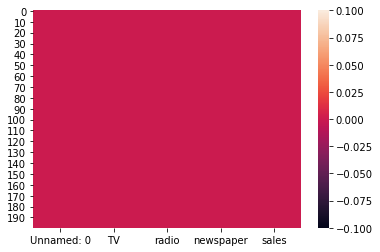

In [34]:
sns.heatmap(ad.isnull())

# summary statistics

In [35]:
ad.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# correlation

In [36]:
ad_corr=ad.corr()
ad_corr

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

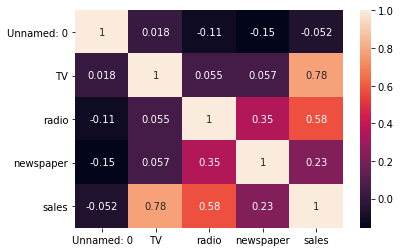

In [37]:
sns.heatmap(ad_corr,annot=True)

In [38]:
ad.corr()['sales'].sort_values()

Unnamed: 0   -0.051616
newspaper     0.228299
radio         0.576223
TV            0.782224
sales         1.000000
Name: sales, dtype: float64

<AxesSubplot:>

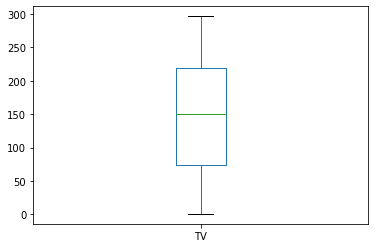

In [39]:
ad['TV'].plot.box()

<AxesSubplot:>

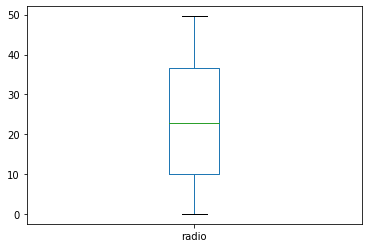

In [40]:
ad['radio'].plot.box()

<AxesSubplot:>

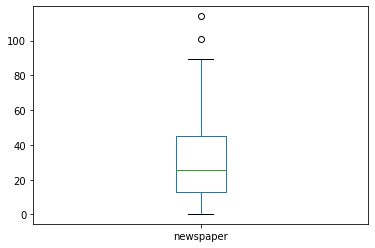

In [41]:
ad['newspaper'].plot.box()

<AxesSubplot:>

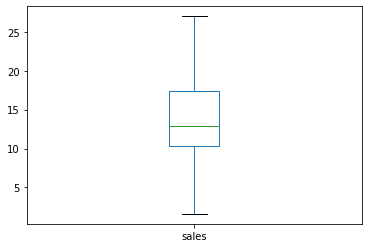

In [42]:
ad['sales'].plot.box()

In [43]:
ad.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

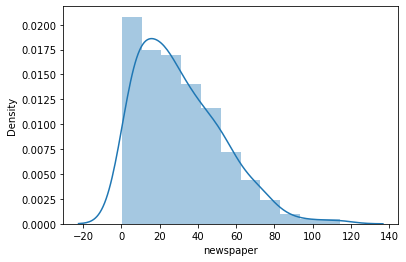

In [44]:
sns.distplot(ad['newspaper'])

<AxesSubplot:xlabel='TV', ylabel='Density'>

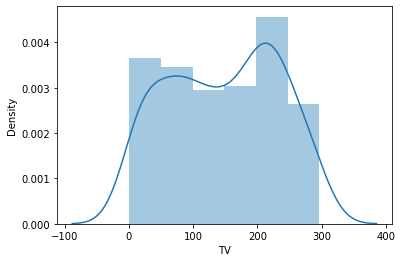

In [45]:
sns.distplot(ad['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

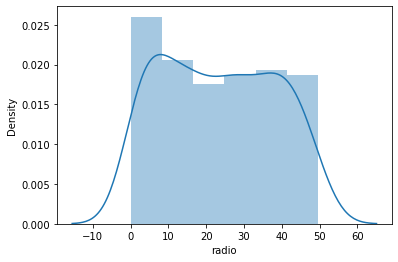

In [46]:
sns.distplot(ad['radio'])

In [47]:
x = ad.iloc[:,1:4]
y = ad.iloc[:,-1]


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=43)

# LinearRegression

In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

print("Predicted results price:",pred)
print("actual price ",y_test)

Predicted results price: [ 8.54034679 15.57247463 12.00612144  9.67279861 11.42385092 18.55293488
 24.02278242  7.05365828 22.12551494 16.72065638  7.85081793 23.11509395
 19.18719498  5.40127091 15.23576551  9.90642579 11.94342451  9.81855823
 21.14401409  9.1534307  20.44468759 12.29808365 13.5869414  10.57031008
 16.26513055  7.86253245 20.69472029 20.35016487  9.00527669 14.11934464
 17.20367735 15.11272068 17.23013018 19.08466691 17.13277712 12.31707038
 12.73960467  6.07982336 10.01695956 13.32737828]
actual price  56      5.5
37     14.7
67     13.4
79     11.0
80     11.8
188    15.9
183    26.2
10      8.6
128    24.7
62     15.7
65      9.3
17     24.4
133    19.6
195     7.6
146    13.2
38     10.1
173    11.7
149    10.1
93     22.2
29     10.5
0      22.1
2       9.3
122    11.6
180    10.5
95     16.9
121     7.0
185    22.6
39     21.5
66      9.5
19     14.6
11     17.4
45     14.9
41     17.1
92     19.4
168    17.1
1      10.4
57     13.2
189     6.7
151    11.6
167  

# Error:

In [50]:
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error :',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

Mean absolute error: 1.1579489313567053
Mean squared error : 2.055024793441357
Root Mean Squared Error: 1.433535766362792


# SVR

In [51]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
pred1=svr.predict(x_test)
print("Predicted results price:",pred1)
print("actual price ",y_test)

Predicted results price: [ 7.69749242 13.5562022  12.9926591  11.52404225 11.38877488 16.67586878
 19.75548246  9.07678054 19.470906   16.70176037  9.35371887 19.72169614
 18.74237608  7.61635356 15.3552679   9.43403595 13.14453766  9.35538401
 19.50932094 10.35012528 19.47458558  9.50795236 14.4295584  12.12010226
 16.87837294  7.99023028 19.24216562 19.19346986  8.56161801 14.64747502
 16.57251747 15.78328982 17.39586392 18.80215115 17.56103292 10.53035317
 13.56477346  7.2648137  12.29922772 14.30373859]
actual price  56      5.5
37     14.7
67     13.4
79     11.0
80     11.8
188    15.9
183    26.2
10      8.6
128    24.7
62     15.7
65      9.3
17     24.4
133    19.6
195     7.6
146    13.2
38     10.1
173    11.7
149    10.1
93     22.2
29     10.5
0      22.1
2       9.3
122    11.6
180    10.5
95     16.9
121     7.0
185    22.6
39     21.5
66      9.5
19     14.6
11     17.4
45     14.9
41     17.1
92     19.4
168    17.1
1      10.4
57     13.2
189     6.7
151    11.6
167  

# RandomForestRegressor

In [52]:
from sklearn.ensemble import RandomForestRegressor
rm = RandomForestRegressor()
rm.fit(x_train, y_train)
pred1 = rm.predict(x_test)
print("Predicted results price:",pred1)
print("actual price ",y_test)

Predicted results price: [ 6.02  13.974 12.758 11.013 12.017 15.317 25.064  9.504 23.192 15.354
  9.88  23.394 19.734  8.48  12.793 10.276 12.139 10.047 22.145 11.371
 21.388  8.104 11.187 10.728 17.735  7.357 21.963 20.972  7.42  15.463
 17.169 15.91  18.53  19.271 16.926 10.981 13.525  6.701 11.624 11.977]
actual price  56      5.5
37     14.7
67     13.4
79     11.0
80     11.8
188    15.9
183    26.2
10      8.6
128    24.7
62     15.7
65      9.3
17     24.4
133    19.6
195     7.6
146    13.2
38     10.1
173    11.7
149    10.1
93     22.2
29     10.5
0      22.1
2       9.3
122    11.6
180    10.5
95     16.9
121     7.0
185    22.6
39     21.5
66      9.5
19     14.6
11     17.4
45     14.9
41     17.1
92     19.4
168    17.1
1      10.4
57     13.2
189     6.7
151    11.6
167    12.2
Name: sales, dtype: float64


# DecisionTreeRegressor

In [53]:
from sklearn.tree import DecisionTreeRegressor
tr = DecisionTreeRegressor()
tr.fit(x_train, y_train)
pred2 = tr.predict(x_train)
print("Predicted results price:",pred2)
print("actual price ",y_test)

Predicted results price: [12.2  9.6  3.2 11.3 14.4 12.2 14.5  9.2 23.7 14.2  5.6  9.7 19.2 14.8
 12.9 10.6 22.4 16.1  6.9  6.6 12.4 11.2 11.7  8.5 11.5 20.2 20.1 15.9
 21.2 18.  21.4 14.6  7.6 15.  11.4  5.9 12.6 17.6 13.4 19.8 12.6 25.4
 15.5 22.3 13.3 11.5  8.7  8.8 12.9  1.6 11.7 12.  23.8 11.3 10.8 11.9
 11.4 10.9 10.9 10.4 15.  12.   9.5 12.9 20.8 10.6 12.9 11.9 20.2 20.7
 10.3  4.8  9.7  7.2 17.4 12.3 11.9 18.4  8.  14.7 14.   5.3  5.3 19.7
 17.3 19.2 12.8 20.7 16.6  6.6 16.6 10.8 13.6 19.  15.2 27.   9.9 10.6
 11.8 25.4  9.7 18.3  8.7 12.7 15.5 22.6  7.2 19.6 15.3 17.2 18.  13.2
 15.9 17.   9.7 15.6 15.9 10.1 19.  18.5 20.7 23.2 21.7 24.2 11.6  8.4
 18.9 15.5 14.8 14.9 11.  14.1  8.1  9.6 11.7 25.4  5.7  9.4  8.7  9.5
 21.8 16.7 15.2 11.8  8.8 12.8 25.5 16.   7.3 13.4  7.3 17.3 10.3 10.7
 12.5 23.8 12.5  9.7 18.  18.9]
actual price  56      5.5
37     14.7
67     13.4
79     11.0
80     11.8
188    15.9
183    26.2
10      8.6
128    24.7
62     15.7
65      9.3
17     24.4
133 

# cross validation

In [55]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x,y, cv=5)
print(score)
print(score.mean())
print(score.std())

[0.87865198 0.91763212 0.92933032 0.81443904 0.89547829]
0.8871063495438436
0.04034052587780586


# saving model

In [56]:
import joblib
joblib.dump(lr,'adv.pkl')

['adv.pkl']